In [255]:
pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 15.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 15.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [448]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [449]:
import re

def remove_html_tags(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)

In [450]:
df = pd.read_csv('/home/manishankar/Desktop/AI_Ml/327164_2024_08_27.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/home/manishankar/Desktop/AI_Ml/327164_2024_08_27.csv'

In [380]:
df.shape

(112306, 2)

In [381]:
df.isnull().sum()

title      19
is_spam     0
dtype: int64

In [382]:
df[df['title'].isnull()]

,title,is_spam
88308,NaN,1
88309,NaN,1
88310,NaN,1
88311,NaN,1
88312,NaN,1
88313,NaN,1
88314,NaN,1
88315,NaN,1
88316,NaN,1
88317,NaN,1


In [383]:
df = df.dropna(axis=0)
df = df.drop_duplicates()

In [384]:
df.shape

(105417, 2)

In [385]:
df['title'] = df['title'].apply(lambda x:remove_html_tags(x))

In [386]:
df.isnull().sum()

title      0
is_spam    0
dtype: int64

In [441]:
df.is_spam.value_counts()

is_spam
0    63618
1    40865
Name: count, dtype: int64

Text(0.5, 0, 'Count')

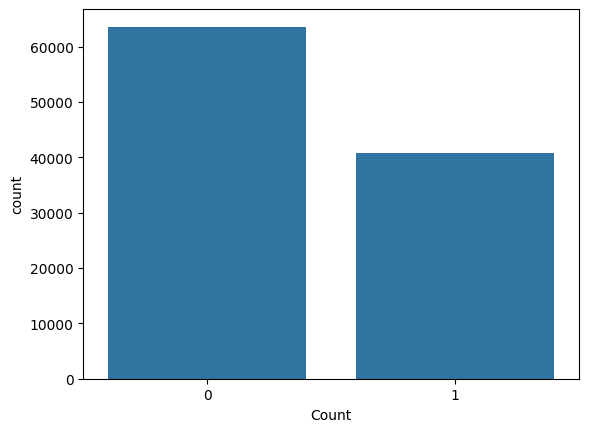

In [447]:
sns.countplot(x=df["is_spam"])
plt.xlabel("Count")

In [388]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105417 entries, 0 to 112305
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    105417 non-null  object
 1   is_spam  105417 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [389]:
newdf = pd.read_csv("new_pattern.csv")
newdf = newdf[["title", "is_spam"]]
newdf["is_spam"].value_counts()

is_spam
0    109
1     90
Name: count, dtype: int64

In [390]:
df = pd.concat([df, newdf], axis=0, ignore_index=True)
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104483 entries, 0 to 105615
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   title    104483 non-null  object
 1   is_spam  104483 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


In [391]:
x = df[['title']]
y = df['is_spam']

In [392]:
ros = RandomOverSampler()
# ros = RandomUnderSampler()
ros_x, ros_y = ros.fit_resample(x, y)


# ros_x = x
# ros_y = y

In [393]:
cv = CountVectorizer()
# cv = TfidfVectorizer()
ros_x = cv.fit_transform(ros_x['title'])
xtrain, xtest, ytrain, ytest = train_test_split(ros_x, ros_y, 
                                                test_size=0.25, 
                                                random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)
print(model.score(xtrain, ytrain))
print(model.score(xtest, ytest))

1.0
0.9995913106353548


In [394]:

cf = confusion_matrix(ytest, model.predict(xtest))
cf

array([[16034,     4],
       [    9, 15762]])

<Axes: >

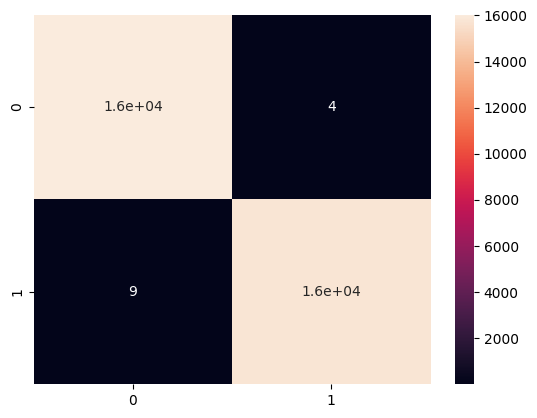

In [395]:
sns.heatmap(cf, annot=True) 
# plt.show()

In [408]:
sample = "What is the passing marks of CA Final?"
data = cv.transform([sample]).toarray()
print(model.predict(data))

[0]


In [397]:
counter = 0
is_spams = list(newdf['is_spam'].values)
for ind, item in enumerate(list(newdf['title'].values)):
    data = cv.transform([item])
    if str(model.predict(data)[0]) != str(is_spams[ind]):
        print(item, is_spams[ind], str(model.predict(data)[0]))
        counter+=1
print(counter)

How can I apply to MZCET? 0 1
How much ragging culture? And education and hostel quality? 0 1
How could I download the certificate? 0 1
3


In [437]:
newdf = pd.read_csv("329147_2024_08_29.csv")
newdf = newdf[["title", "is_spam"]]
newdf = newdf.dropna(axis=0)
newdf["is_spam"] = newdf["is_spam"].astype(int)
newdf

,title,is_spam
0,Where we can check the ICAI CA final result Ma...,0
1,When will ICAI result May 2024 will be declared?,0
2,What are the details mentioned in the CA Final...,0
3,What are the official websites to check the CA...,0
4,What is the passing marks of CA Final?,0
...,...,...
95,When will the results of IIT JAM 2024 be relea...,0
96,Will I receive my IIT JAM 2024 scorecard throu...,0
97,Where will the results of IIT JAM 2024 be anno...,0
98,When will the IIT JAM 2024 scorecard be relea...,0


In [438]:
x = newdf[['title']]
y = newdf['is_spam']

In [439]:
x = cv.transform(x["title"])
model.score(x, y)*100

61.702127659574465

<Axes: >

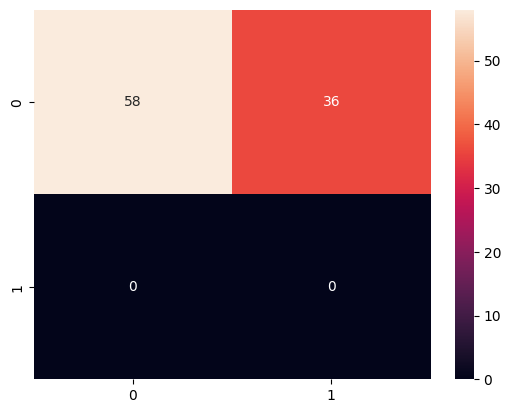

In [440]:
sns.heatmap(confusion_matrix(y, model.predict(x)), annot=True)

In [402]:
confusion_matrix(y, model.predict(x))

array([[106,   3],
       [  0,  90]])

In [403]:
data = pd.DataFrame({
    "x":x,
    "y actual": y,
    "y predicted":model.predict(x)
})

data

,x,y actual,y predicted
0,<Compressed Sparse Row sparse matrix of dtype ...,0,0
1,<Compressed Sparse Row sparse matrix of dtype ...,1,1
2,<Compressed Sparse Row sparse matrix of dtype ...,0,0
3,<Compressed Sparse Row sparse matrix of dtype ...,0,0
4,<Compressed Sparse Row sparse matrix of dtype ...,0,0
...,...,...,...
194,<Compressed Sparse Row sparse matrix of dtype ...,1,1
195,<Compressed Sparse Row sparse matrix of dtype ...,1,1
196,<Compressed Sparse Row sparse matrix of dtype ...,1,1
197,<Compressed Sparse Row sparse matrix of dtype ...,0,0


In [435]:
newdf = pd.read_csv("329147_2024_08_29.csv")
newdf = newdf.dropna(axis=0)
newdf["is_spam"] = newdf["is_spam"].astype(int)
newdf

,title,is_spam
0,Where we can check the ICAI CA final result Ma...,0
1,When will ICAI result May 2024 will be declared?,0
2,What are the details mentioned in the CA Final...,0
3,What are the official websites to check the CA...,0
4,What is the passing marks of CA Final?,0
...,...,...
95,When will the results of IIT JAM 2024 be relea...,0
96,Will I receive my IIT JAM 2024 scorecard throu...,0
97,Where will the results of IIT JAM 2024 be anno...,0
98,When will the IIT JAM 2024 scorecard be relea...,0


In [436]:
counter = 0
is_spams = list(newdf['is_spam'].values)
for ind, item in enumerate(list(newdf['title'].values)):
    data = cv.transform([item])
    if str(model.predict(data)[0]) != str(is_spams[ind]):
        print(item, is_spams[ind], str(model.predict(data)[0]))
        counter+=1
print(counter)

Where we can check the ICAI CA final result May 2024? 0 1
When will ICAI result May 2024 will be declared? 0 1
When will CAT 2024 notification be released? 0 1
Is CAT exam compulsory for MBA? 0 1
Is CAT held twice a year? 0 1
How to edit CAT application form after submission? 0 1
When ICAI CA Foundation exam result will be declared? 0 1
Is it ok to fail in CA Foundation? 0 1
Can I crack CA Foundation in 15 days? 0 1
Can I access NIOS hall tickets without an enrollment number? 0 1
What to do if I have forgotten my enrollment number? 0 1
How long should a candidate retain NIOS Admit Card? 0 1
When will the NIOS 10th exams 2024 be held? 0 1
When will NIOS on-demand exams be held? 0 1
I want to know the Kirori Mal College expected cutoff 2024 for B.A. (H) English, EWS category? 0 1
When will DU second cutoff 2024 be out? 0 1
What is SSC je salary? 0 1
Is there any age limit to appear for IIT JAM 2021? 0 1
What shall I upload in my class Xand XII certificate fields? 0 1
How can I check my e